# Epochs objects 

In [1]:
import mne
import os.path as op
from __future__ import print_function
import numpy as np
from matplotlib import pyplot as plt

`Epochs` objects are a way of representing continuous data as a collection of time-locked trials, stored in an array of `shape(n_events, n_channels, n_times)`. They are useful for many statistical methods in neuroscience, and make it easy to quickly overview what occurrs during a trial.

`Epochs` can be created in three ways:
1. From a `Raw` object, along with event times
1. From an epochs object that has been saved as a `.fif` file
1. From scratch using `EpochsArray`

In [10]:
# Load a dataset that contains events
raw = mne.io.RawFIF(op.join(mne.datasets.sample.data_path(), 'MEG', 'sample', 'sample_audvis_raw.fif'))

Opening raw data file /Users/choldgraf/github/mne-python/examples/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
Current compensation grade : 0
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Adding average EEG reference projection.
1 projection items deactivated


In [11]:
# If your raw object has a stim channel, you can construct an event array easily
events = mne.find_events(raw)

# Show the number of events (number of rows)
print('Number of events:', len(events))

# Show all unique event codes (3rd column)
print('Unique event codes:', np.unique(events[:, 2]))

# Specify event codes of interest with descriptive labels
event_id = dict(left=1, right=2)

Reading 0 ... 166799  =      0.000 ...   277.714 secs...
[done]
320 events found
Events id: [ 1  2  3  4  5 32]
Number of events: 320
Unique event codes: [ 1  2  3  4  5 32]


Now, we can create an `Epochs` object with the events we've extracted. Note that epochs constructed in this manner will not have their data available until explicitly read into memory, which you can do with `get_data()`. Alternatively, you can use `preload=True`. 

Note that there are many options available when loading an `Epochs` object. For more detailed information, see (**LINK TO EPOCHS LOADING TUTORIAL**)

In [19]:
# Expose the raw data as epochs, cut from -0.1 s to 1.0 s relative to the event onsets 
epochs = mne.Epochs(raw, events, event_id, tmin=-0.1, tmax=1,
                    baseline=(None, 0), preload=True)
print(epochs)

Created an SSP operator (subspace dimension = 4)
4 projection items activated
145 matching events found
Reading 2117 ... 2778  =      3.525 ...     4.625 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 2911 ... 3572  =      4.847 ...     5.947 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 3792 ... 4453  =      6.314 ...     7.414 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 4590 ... 5251  =      7.642 ...     8.743 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 5380 ... 6041  =      8.957 ...    10.058 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 6241 ... 6902  =     10.391 ...    11.492 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 7075 ... 7736  =     11.780 ...    12.880 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 7852 ... 8513  =     13.073 ...    14.174 secs...
[done]
Applying baseline correction ... (mode: mean)
Reading 

Epochs behave similarly to `Raw` objects. They have an `Info` attribute that has all of the same information, as well as a number of attributes unique to the events contained within the object.

In [32]:
print(epochs.events[:3], epochs.event_id, sep='\n\n')

[[27977     0     2]
 [28771     0     1]
 [29652     0     2]]

{'right': 2, 'left': 1}


You can select subsets of epochs by indexing the `Epochs` object directly. Alternatively, if you have epoch names specified in `event_id` then you may index with strings instead.

In [35]:
print(epochs[1:5])
print(epochs['right'])

<Epochs  |  n_events : 4 (all good), tmin : -0.1 (s), tmax : 1 (s), baseline : (None, 0),
 'left': 2, 'right': 2>
<Epochs  |  n_events : 73 (all good), tmin : -0.1 (s), tmax : 1 (s), baseline : (None, 0)>


It is also possible to iterate through `Epochs` objects in this way. Note that behavior is different if you iterate on `Epochs` directly rather than indexing:

In [50]:
# These will be epochs objects
for i in range(3):
    print(epochs[i])
    
# These will be arrays
for ep in epochs[:2]:
    print(ep)

<Epochs  |  n_events : 1 (all good), tmin : -0.1 (s), tmax : 1 (s), baseline : (None, 0)>
<Epochs  |  n_events : 1 (all good), tmin : -0.1 (s), tmax : 1 (s), baseline : (None, 0)>
<Epochs  |  n_events : 1 (all good), tmin : -0.1 (s), tmax : 1 (s), baseline : (None, 0)>
[[ -1.56510152e-12  -6.00746037e-13   3.63609444e-13 ...,  -5.42252344e-12
   -3.49381248e-12   8.07845329e-12]
 [  4.71111366e-12   2.78240270e-12  -1.10663744e-13 ...,  -2.03937471e-12
   -1.07501922e-12   1.81804722e-12]
 [  1.27694161e-13   1.26810933e-13   8.74659808e-14 ...,   3.27176412e-14
    5.59107736e-14   6.80975243e-14]
 ..., 
 [  1.23131267e-06   7.56233126e-07   3.00980681e-07 ...,  -4.92607996e-06
   -5.29288884e-06  -4.96516158e-06]
 [  2.15536774e-06   2.46614632e-06   2.39846713e-06 ...,  -4.64649509e-06
   -4.75225661e-06  -4.52661069e-06]
 [  1.26772322e-05   1.26772322e-05   1.33309187e-05 ...,  -1.41239155e-05
   -1.41239155e-05  -1.15091693e-05]]
[[ -1.38645862e-11  -1.48289417e-11  -1.48289417e-

If you wish to look at the average across trial types, then you may do so, creating an `Evoked` object in the process.

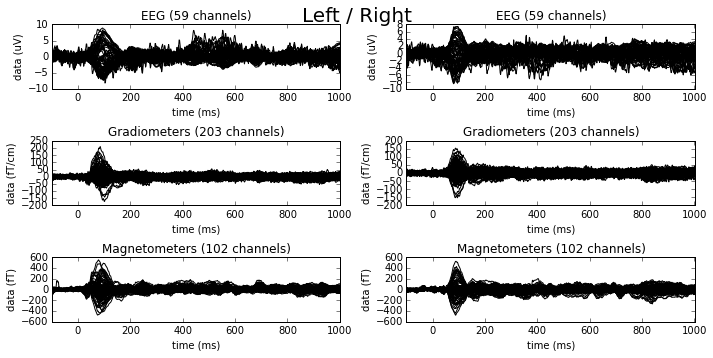

In [56]:
ev_left = epochs['left'].average()
ev_right = epochs['right'].average()

f, axs = plt.subplots(3, 2, figsize=(10, 5))
_ = f.suptitle('Left / Right', fontsize=20)
_ = ev_left.plot(axes=axs[:, 0], show=False)
_ = ev_right.plot(axes=axs[:, 1], show=False)
plt.tight_layout()
plt.show()